## 5.복습 문제 : titanic

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

### (1) 데이터 전처리

* url :  'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'

**[titanic_simple 데이터 셋 정보]**

- PassengerId : 승객번호
- Survived : 생존여부(1:생존, 0:사망)
- Pclass : 객실등급(1:1등급, 2:2등급, 3:3등급)
- Name : 승객이름
- Sex : 성별(male, female)
- Age : 나이
- Fare : 운임($)
- Embarked : 승선지역(Southhampton, Cherbourg, Queenstown)

#### 1) 데이터 로딩

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv')
data.dropna(inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


#### 2) 불필요한 변수 제거

In [ ]:
data.drop(columns=['PassengerId', 'Name'], inplace=True)

#### 3) x,y 분할

In [ ]:
target = "Survived"
x = data.drop(target, axis=1)
y = data.loc[:, target]

#### 4) 가변수화

In [ ]:
cat_cols = ["Sex", "Embarked"]
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)
x.head()

,Pclass,Age,Fare,Sex_male,Embarked_Queenstown,Embarked_Southampton
0,3,22.0,7.2500,True,False,True
1,1,38.0,71.2833,False,False,False
2,3,26.0,7.9250,False,False,True
3,1,35.0,53.1000,False,False,True
4,3,35.0,8.0500,True,False,True


#### 5) train, val 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=.3, random_state=20)

### (2) 모델링

* 모델 선언
* 학습
* 예측
* 성능 검증

#### 1) 모델 선언

In [ ]:
model=LogisticRegression()

#### 2) 학습

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

#### 3) 예측

In [ ]:
pred = model.predict(x_val)
pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [ ]:
pred_p = model.predict_proba(x_val)
pred_p[:10]

array([[0.2699854 , 0.7300146 ],
       [0.28256731, 0.71743269],
       [0.77257008, 0.22742992],
       [0.8750439 , 0.1249561 ],
       [0.72726834, 0.27273166],
       [0.40649128, 0.59350872],
       [0.86761257, 0.13238743],
       [0.56462697, 0.43537303],
       [0.58123965, 0.41876035],
       [0.74446829, 0.25553171]])

#### 4) 검증평가
만든 모델은 얼마나 정확한지 검증해 봅시다.



In [ ]:
accuracy_score(y_val, pred)

0.794392523364486

In [ ]:
confusion_matrix( y_val , pred  )

array([[106,  23],
       [ 21,  64]])

In [ ]:
print(classification_report(y_val , pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       129
           1       0.74      0.75      0.74        85

    accuracy                           0.79       214
   macro avg       0.79      0.79      0.79       214
weighted avg       0.80      0.79      0.79       214



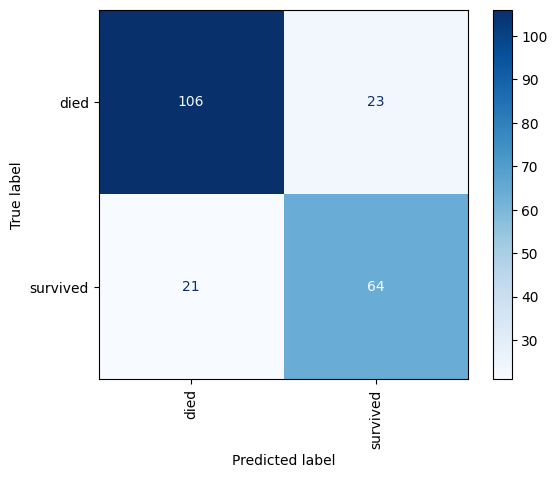

In [ ]:
cm = confusion_matrix( y_val , pred  )

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['died', 'survived'])
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()